In [1]:
import pandas as pd

In [5]:
policies = pd.read_table('ChurnModelDatasetV2.txt',index_col='no_')

In [12]:
#policies.shape
#policies.values            # underlying numpy array
policies.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 322529 entries, 0257606 to 0262554
Data columns (total 28 columns):
Cancelled                      322529 non-null int64
PlanType                       322529 non-null object
ClaimedInThePast               322529 non-null int64
BenefitToClaimRatio            322529 non-null float64
AvgTurnaround                  123814 non-null float64
irsd_decile                    320321 non-null float64
premium payment period code    322529 non-null object
payment method code            322529 non-null object
InsuredGender                  322529 non-null object
premium                        322529 non-null float64
breed risk group               322529 non-null int64
CXMonthsFromRenewal            96881 non-null float64
TenureInMonths                 322529 non-null int64
PetAgeInMonths                 322509 non-null float64
SalesChannel                   322529 non-null object
pet agegroup when join         322509 non-null object
client agegroup when j

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

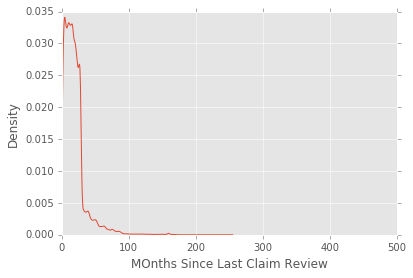

In [15]:
policies.MonthsSinceLastClaimReview.plot(kind='density', xlim=(0,500))
plt.xlabel('Months Since Last Claim review')

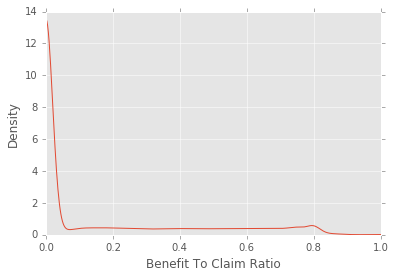

In [17]:
policies.BenefitToClaimRatio.plot(kind='density', xlim=(0,1))
plt.xlabel('Benefit To Claim Ratio')

In [27]:
policies.columns = [c.replace(' ', '_') for c in policies.columns]
policies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322529 entries, 0257606 to 0262554
Data columns (total 28 columns):
Cancelled                      322529 non-null int64
PlanType                       322529 non-null object
ClaimedInThePast               322529 non-null int64
BenefitToClaimRatio            322529 non-null float64
AvgTurnaround                  123814 non-null float64
irsd_decile                    320321 non-null float64
premium_payment_period_code    322529 non-null object
payment_method_code            322529 non-null object
InsuredGender                  322529 non-null object
premium                        322529 non-null float64
breed_risk_group               322529 non-null int64
CXMonthsFromRenewal            96881 non-null float64
TenureInMonths                 322529 non-null int64
PetAgeInMonths                 322509 non-null float64
SalesChannel                   322529 non-null object
pet_agegroup_when_join         322509 non-null object
client_agegroup_when_j

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f616390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13c821450>]], dtype=object)

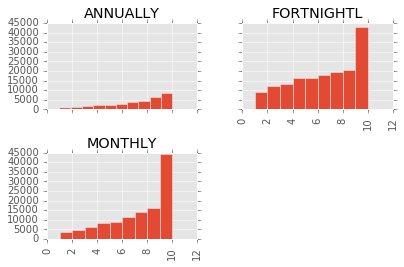

In [30]:
policies.irsd_decile.hist(by=policies.premium_payment_period_code, sharex=True, sharey=True)

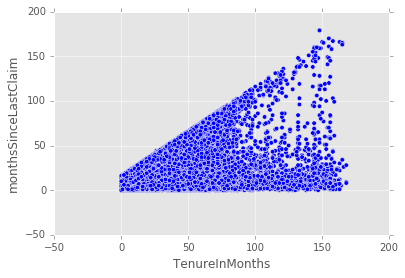

In [35]:
colors = np.where(policies.species_code=='canine', 'r', 'b')
policies.plot(kind='scatter', x='TenureInMonths', y='monthsSinceLastClaim', c=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1500830d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1bd9cc690>]], dtype=object)

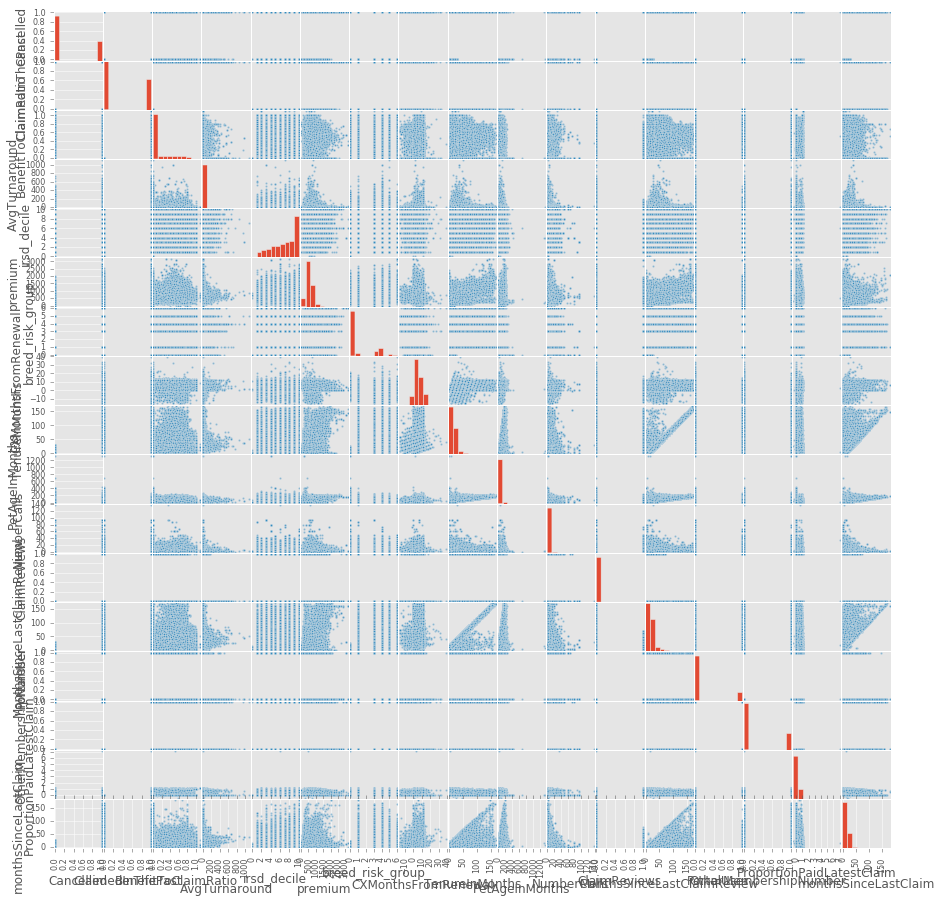

In [44]:
pd.scatter_matrix(policies, figsize=(15,15))

In [37]:
import statsmodels.formula.api as smf

In [38]:
policies.describe()

,Cancelled,ClaimedInThePast,BenefitToClaimRatio,AvgTurnaround,irsd_decile,premium,breed_risk_group,CXMonthsFromRenewal,TenureInMonths,PetAgeInMonths,NumberCalls,ClaimReviews,MonthsSinceLastClaimReview,PortalUser,OtherMembershipNumber,ProportionPaidLatestClaim,monthsSinceLastClaim
count,322529.000000,322529.000000,322529.000000,123814.000000,320321.000000,322529.000000,322529.000000,96881.000000,322529.000000,322509.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000
mean,0.300379,0.387373,0.147278,8.604381,6.601550,564.833240,1.040511,5.039605,16.187881,44.664685,2.084396,0.013252,18.395378,0.158166,0.272282,0.135341,12.974672
std,0.458424,0.487151,0.251836,23.080389,2.690181,212.817854,1.765677,4.253137,15.712093,37.679298,3.232954,0.114350,16.946025,0.364897,0.445135,0.277346,11.628549
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.451296,0.000000
25%,0.000000,0.000000,0.000000,0.333333,5.000000,424.720000,0.000000,1.000000,6.000000,17.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,2.000000,7.000000,553.540000,0.000000,4.000000,13.000000,31.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,0.225591,8.000000,9.000000,684.720000,1.000000,9.000000,22.000000,63.000000,3.000000,0.000000,24.000000,0.000000,1.000000,0.000000,19.000000
max,1.000000,1.000000,1.100062,1105.000000,10.000000,3174.880000,6.000000,39.000000,168.000000,1331.000000,138.000000,1.000000,170.000000,1.000000,1.000000,7.113636,179.000000


In [43]:
policies.corr()

,Cancelled,ClaimedInThePast,BenefitToClaimRatio,AvgTurnaround,irsd_decile,premium,breed_risk_group,CXMonthsFromRenewal,TenureInMonths,PetAgeInMonths,NumberCalls,ClaimReviews,MonthsSinceLastClaimReview,PortalUser,OtherMembershipNumber,ProportionPaidLatestClaim,monthsSinceLastClaim
Cancelled,1.000000,0.039484,0.030851,0.103089,-0.074906,0.108601,0.280657,NaN,0.247512,0.185485,0.170798,0.031358,0.436389,-0.133402,-0.077155,0.014278,0.371182
ClaimedInThePast,0.039484,1.000000,0.735450,NaN,0.083201,0.233247,0.197124,0.201397,0.295807,0.017910,0.267774,0.145178,0.266300,0.194758,0.029072,0.613678,-0.198250
BenefitToClaimRatio,0.030851,0.735450,1.000000,-0.005230,0.053577,0.239374,0.199969,0.152885,0.308179,0.045650,0.266458,0.086923,0.280033,0.136351,0.002050,0.796232,-0.152307
AvgTurnaround,0.103089,NaN,-0.005230,1.000000,-0.010002,0.039247,0.100603,0.005075,0.082085,0.108976,0.053885,-0.014730,0.096018,-0.057147,-0.004836,-0.008055,0.138100
irsd_decile,-0.074906,0.083201,0.053577,-0.010002,1.000000,-0.008470,0.006775,0.049074,0.043387,-0.028660,-0.024382,0.019769,0.021699,0.044773,0.081928,0.044136,-0.034411
premium,0.108601,0.233247,0.239374,0.039247,-0.008470,1.000000,0.197841,-0.078479,0.259491,0.133160,0.117748,0.050822,0.244079,-0.022871,-0.196018,0.195357,-0.034996
breed_risk_group,0.280657,0.197124,0.199969,0.100603,0.006775,0.197841,1.000000,0.218182,0.539891,0.210192,0.252374,0.052009,0.562460,-0.078568,-0.015735,0.154198,0.417350
CXMonthsFromRenewal,NaN,0.201397,0.152885,0.005075,0.049074,-0.078479,0.218182,1.000000,0.242095,0.121013,0.057582,0.038748,0.232883,-0.013735,0.041736,0.122115,0.201516
TenureInMonths,0.247512,0.295807,0.308179,0.082085,0.043387,0.259491,0.539891,0.242095,1.000000,0.441808,0.200149,0.071935,0.950129,-0.098241,0.002692,0.228439,0.548704
PetAgeInMonths,0.185485,0.017910,0.045650,0.108976,-0.028660,0.133160,0.210192,0.121013,0.441808,1.000000,0.118383,0.047043,0.433660,-0.101854,-0.005998,0.022842,0.285874


In [45]:
lm = smf.ols(formula='Cancelled ~ ClaimedInThePast + irsd_decile + premium + TenureInMonths + MonthsSinceLastClaimReview', data=policies).fit()

# print the coefficients
lm.params

Intercept                     0.073809
ClaimedInThePast             -0.008725
irsd_decile                  -0.007452
premium                       0.000116
TenureInMonths               -0.050373
MonthsSinceLastClaimReview    0.055924
dtype: float64

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cancelled   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 5.997e+04
Date:                Sat, 14 May 2016   Prob (F-statistic):               0.00
Time:                        16:15:03   Log-Likelihood:                -98781.
No. Observations:              320321   AIC:                         1.976e+05
Df Residuals:                  320315   BIC:                         1.976e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.0738      0.002     33.282      0.000         0.069     0.078
ClaimedInThePast              -0.0087      0.001     -6.846      0.000        -0.011    -0.006
irsd_decile                   -0.0075      0.000    -34.242      0.000        -0.008    -0.007
premium                        0.0001   2.88e-06     40.495      0.000         0.000     0.000
TenureInMonths                -0.0504      0.000   -417.235      0.000        -0.051    -0.050
MonthsSinceLastClaimReview     0.0559      0.000    505.557      0.000         0.056     0.056
==============================================================================
Omnibus:                   299098.799   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35674768.661
Skew:                           4.142   Prob(JB):                         0.00
Kurtosis:                      54.032   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
! pip install seaborn

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


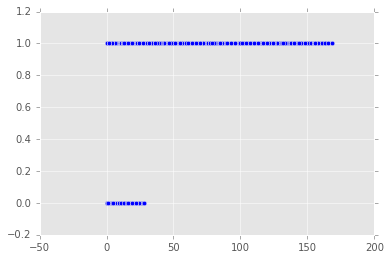

In [49]:
plt.scatter(policies.TenureInMonths, policies.Cancelled)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

feature_cols = ['TenureInMonths']
X = policies[feature_cols]
y = policies.Cancelled
logreg.fit(X, y)
policies_pred_class = logreg.predict(X)

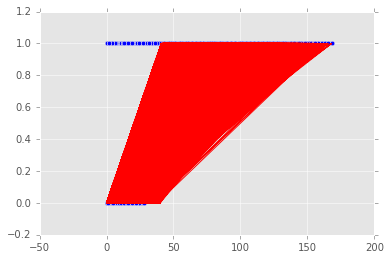

In [56]:
# plot the class predictions
plt.scatter(policies.TenureInMonths, policies.Cancelled)
plt.plot(policies.TenureInMonths, policies_pred_class, color='red')

In [57]:
policies_pred_prob = logreg.predict_proba(X)[:, 1]
policies_pred_prob

array([ 0.2051354 ,  0.19923453,  0.21116494, ...,  0.29340341,
        0.34087254,  0.19923453])

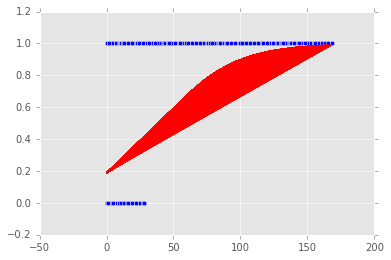

In [58]:
# plot the predicted probabilities
plt.scatter(policies.TenureInMonths, policies.Cancelled)
plt.plot(policies.TenureInMonths, policies_pred_prob, color='red')

In [63]:
print logreg.predict_proba(11)

[[ 0.74304024  0.25695976]]


In [64]:
policies.describe()

,Cancelled,ClaimedInThePast,BenefitToClaimRatio,AvgTurnaround,irsd_decile,premium,breed_risk_group,CXMonthsFromRenewal,TenureInMonths,PetAgeInMonths,NumberCalls,ClaimReviews,MonthsSinceLastClaimReview,PortalUser,OtherMembershipNumber,ProportionPaidLatestClaim,monthsSinceLastClaim
count,322529.000000,322529.000000,322529.000000,123814.000000,320321.000000,322529.000000,322529.000000,96881.000000,322529.000000,322509.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000,322529.000000
mean,0.300379,0.387373,0.147278,8.604381,6.601550,564.833240,1.040511,5.039605,16.187881,44.664685,2.084396,0.013252,18.395378,0.158166,0.272282,0.135341,12.974672
std,0.458424,0.487151,0.251836,23.080389,2.690181,212.817854,1.765677,4.253137,15.712093,37.679298,3.232954,0.114350,16.946025,0.364897,0.445135,0.277346,11.628549
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.451296,0.000000
25%,0.000000,0.000000,0.000000,0.333333,5.000000,424.720000,0.000000,1.000000,6.000000,17.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,2.000000,7.000000,553.540000,0.000000,4.000000,13.000000,31.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,0.225591,8.000000,9.000000,684.720000,1.000000,9.000000,22.000000,63.000000,3.000000,0.000000,24.000000,0.000000,1.000000,0.000000,19.000000
max,1.000000,1.000000,1.100062,1105.000000,10.000000,3174.880000,6.000000,39.000000,168.000000,1331.000000,138.000000,1.000000,170.000000,1.000000,1.000000,7.113636,179.000000


In [75]:
feature_cols = ['ClaimedInThePast','irsd_decile',
                'breed_risk_group','TenureInMonths',
                'PetAgeInMonths','NumberCalls','ClaimReviews','MonthsSinceLastClaimReview',
                'PortalUser','OtherMembershipNumber','ProportionPaidLatestClaim','monthsSinceLastClaim']
X = policies[feature_cols]
y = policies.Cancelled

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').